# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import re

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости результатов, т е чтобы кто-то другой смог получить те же результаты")

Для воспроизводимости результатов, т е чтобы кто-то другой смог получить те же результаты


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
# df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
# df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

df_train = pd.read_csv('cars_train.csv')
df_test = pd.read_csv('cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
# можно и так
# df_test

pd.concat([df_test.iloc[:5], df_test.iloc[-5:]])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
# совместим оба датасета
pd.concat([df_train.isna().sum(), df_test.isna().sum()], axis=1)

,0,1
name,0,0
year,0,0
selling_price,0,0
km_driven,0,0
fuel,0,0
seller_type,0,0
transmission,0,0
owner,0,0
mileage,202,19
engine,202,19


Видим пропуски в колонках mileage, engine, max_power, torque, seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [9]:
(df_train.drop('selling_price', axis=1).duplicated()*1).sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [10]:
df_train.loc[df_train.drop('selling_price', axis=1).duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [11]:
df_train = df_train.loc[~df_train.drop('selling_price', axis=1).duplicated(keep='first')]

In [12]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [13]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

Обработка mileage

In [14]:
# посмотрим на единицы измерения признака mileage
df_train.mileage.str.replace(r'\d+', '', regex=True).value_counts()

. kmpl     5577
. km/kg      77
Name: mileage, dtype: int64

In [15]:
# в среднем в 1л бензина 0.73 кг, переведем км/л в км/кг
def correct_mileage(x):
    if pd.isnull(x):
        return x
    elif 'km/kg' in x:
        return float(re.sub(r'[^\d\.]', '', x)) * 0.73
    else:
        return float(re.sub(r'[^\d\.]', '', x))
    
# обновляем треин и тест   
df_train.mileage = df_train.mileage.apply(correct_mileage)
df_test.mileage = df_test.mileage.apply(correct_mileage)

Обработка engine

In [16]:
# посмотрим на уникальные единицы измерения признака engine
df_train.engine.replace(r'\d+', '', regex=True).unique()

array([' CC', nan], dtype=object)

In [17]:
# обновляем треин и тест
df_train.engine = df_train.engine.apply(lambda x: np.nan if pd.isnull(x) else float(re.sub(r'[^\d\.]', '', x)))
df_test.engine = df_test.engine.apply(lambda x: np.nan if pd.isnull(x) else float(re.sub(r'[^\d\.]', '', x)))

Обработка max_power

In [18]:
# посмотрим на уникальные единицы измерения признака max_power, видим, что есть объекты без единиц измерения
df_train.max_power.replace(r'\d+', '', regex=True).unique() 

array([' bhp', '. bhp', nan, ''], dtype=object)

In [19]:
# посмотрим подробнее на объекты без единиц измерения 
df_train.loc[~df_train.max_power.str.contains('bhp', na=False)].max_power.unique()

array([nan, '0'], dtype=object)

In [20]:
# обновляем треин и тест
# также проставим nan везде, где нормальной информации нет, например, для " bhp", "0"
df_train.max_power = df_train.max_power.apply(lambda x: np.nan if pd.isnull(x) 
                                              or re.match(r'.*\d+\.?\d+?.*', x) is None 
                                              else float(re.sub(r'[^\d\.]', '', x)))
df_test.max_power = df_test.max_power.apply(lambda x: np.nan if pd.isnull(x) or 
                                            re.match(r'.*\d+\.?\d+?.*', x) is None 
                                            else float(re.sub(r'[^\d\.]', '', x)))

Обработка torque

Работает плохо, далее не использую

In [21]:
def set_torque(i):
    if pd.isnull(i):
        return np.nan
    
    if '@' in i:
        supp = ''.join(i.lower().replace('(', '@').split('@')[::2]).replace(' ', '')
    elif '/' in i:
        supp = ''.join(i.lower().replace('/', '@').split('@')[::2]).replace(' ', '')
    else:
        supp = ''.join(i.lower().split('at')[::2]).replace(' ', '')
        
    if 'kgm' in supp:
        res = round(float(re.sub(r'[^\d\.]', '', supp))/0.10197, 2)
    elif 'nm' in supp and 'rpm' in supp:
        res = float(re.search(r'\d+', supp).group())
    else:
        res = float(re.sub(r'[^\d\.]', '', supp))
    return res


def set_max_torque_rpm(i):
    if pd.isnull(i):
        return np.nan
    
    if '@' in i:
        supp = ''.join(i.lower().replace('(', '@').split('@')[1::2]).replace(' ', '')
    elif '/' in i:
        supp = ''.join(i.lower().replace('/', '@').split('@')[1::2]).replace(' ', '')
    else:
        supp = ''.join(i.lower().split('at')[1::2]).replace(' ', '')
        
    if len(supp) == 0:
        return np.nan
    elif '~' in supp:
        return float(re.sub(r'[^\d\.\-\~]', '', supp).split('~')[-1])
    else:
        return float(re.sub(r'[^\d\.\-]', '', supp).split('-')[-1])

In [22]:
# применяем функции
df_train_trq_test = df_train.copy()
df_train_trq_test.rename(columns={'torque':'torque_orig'}, inplace=True)
df_train_trq_test['torque'] = df_train_trq_test.torque_orig.apply(set_torque)
df_train_trq_test['max_torque_rpm'] = df_train_trq_test.torque_orig.apply(set_max_torque_rpm)
df_train_trq_test.drop('torque_orig', axis=1, inplace=True)

df_test_trq_test = df_test.copy()
df_test_trq_test.rename(columns={'torque':'torque_orig'}, inplace=True)
df_test_trq_test['torque'] = df_test_trq_test.torque_orig.apply(set_torque)
df_test_trq_test['max_torque_rpm'] = df_test_trq_test.torque_orig.apply(set_max_torque_rpm)
df_test_trq_test.drop('torque_orig', axis=1, inplace=True)

(array([  4.,   0.,  10., 169., 138., 231., 149., 137., 109.,  30.]),
 array([  11.2 ,  530.08, 1048.96, 1567.84, 2086.72, 2605.6 , 3124.48,
        3643.36, 4162.24, 4681.12, 5200.  ]),
 <BarContainer object of 10 artists>)

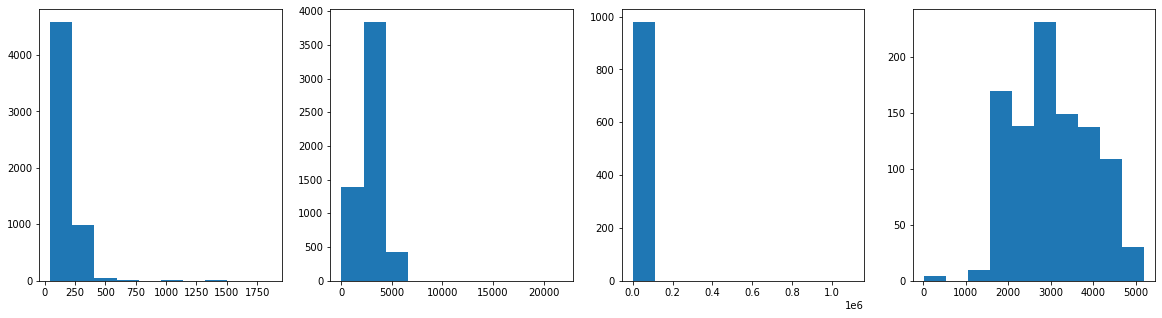

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].hist(df_train_trq_test.torque)
ax[1].hist(df_train_trq_test.max_torque_rpm)
ax[2].hist(df_test_trq_test.torque)
ax[3].hist(df_test_trq_test.max_torque_rpm)

In [24]:
# удаляем torque 
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [25]:
# посмотрим на столбцы с пропусками
pd.concat([df_train.isna().sum(), df_test.isna().sum()], axis=1)

,0,1
name,0,0
year,0,0
selling_price,0,0
km_driven,0,0
fuel,0,0
seller_type,0,0
transmission,0,0
owner,0,0
mileage,186,19
engine,186,19


In [26]:
# заменяем пропуски в трейне и тесте медианами из трейна
# записываем медианы для pickle, чтобы использовать в сервисе
result_dict = {}
for col in ['mileage', 'engine', 'max_power', 'seats']:
    df_train.loc[df_train[col].isna(), col] = df_train[col].median()
    df_test.loc[df_test[col].isna(), col] = df_train[col].median()
    result_dict[col + '_median'] = df_train[col].median()

In [27]:
# проверка пропусков после замены
pd.concat([df_train.isna().sum(), df_test.isna().sum()], axis=1)

,0,1
name,0,0
year,0,0
selling_price,0,0
km_driven,0,0
fuel,0,0
seller_type,0,0
transmission,0,0
owner,0,0
mileage,0,0
engine,0,0



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

Предполагаю, что количество кресел скорее может говорить о типе кузова. Большее или меньшее количество кресел не говорит о каком-то преимуществе (то, как мы сравниваем числовые признаки), поэтому в числах, наверно, не совсем корректно сравнивать.

In [28]:
# your code here
df_train.engine = df_train.engine.astype(int)
df_test.engine = df_test.engine.astype(int)

df_train.seats = df_train.seats.astype(int)
df_test.seats = df_test.seats.astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [29]:
# числовые признаки
num_cols = df_train.select_dtypes(np.number).columns.tolist()

In [30]:
# в оригинальном трейне есть 2 выброса в km_driven, которые искривляют графики
# sns.pairplot(df_train[num_cols])

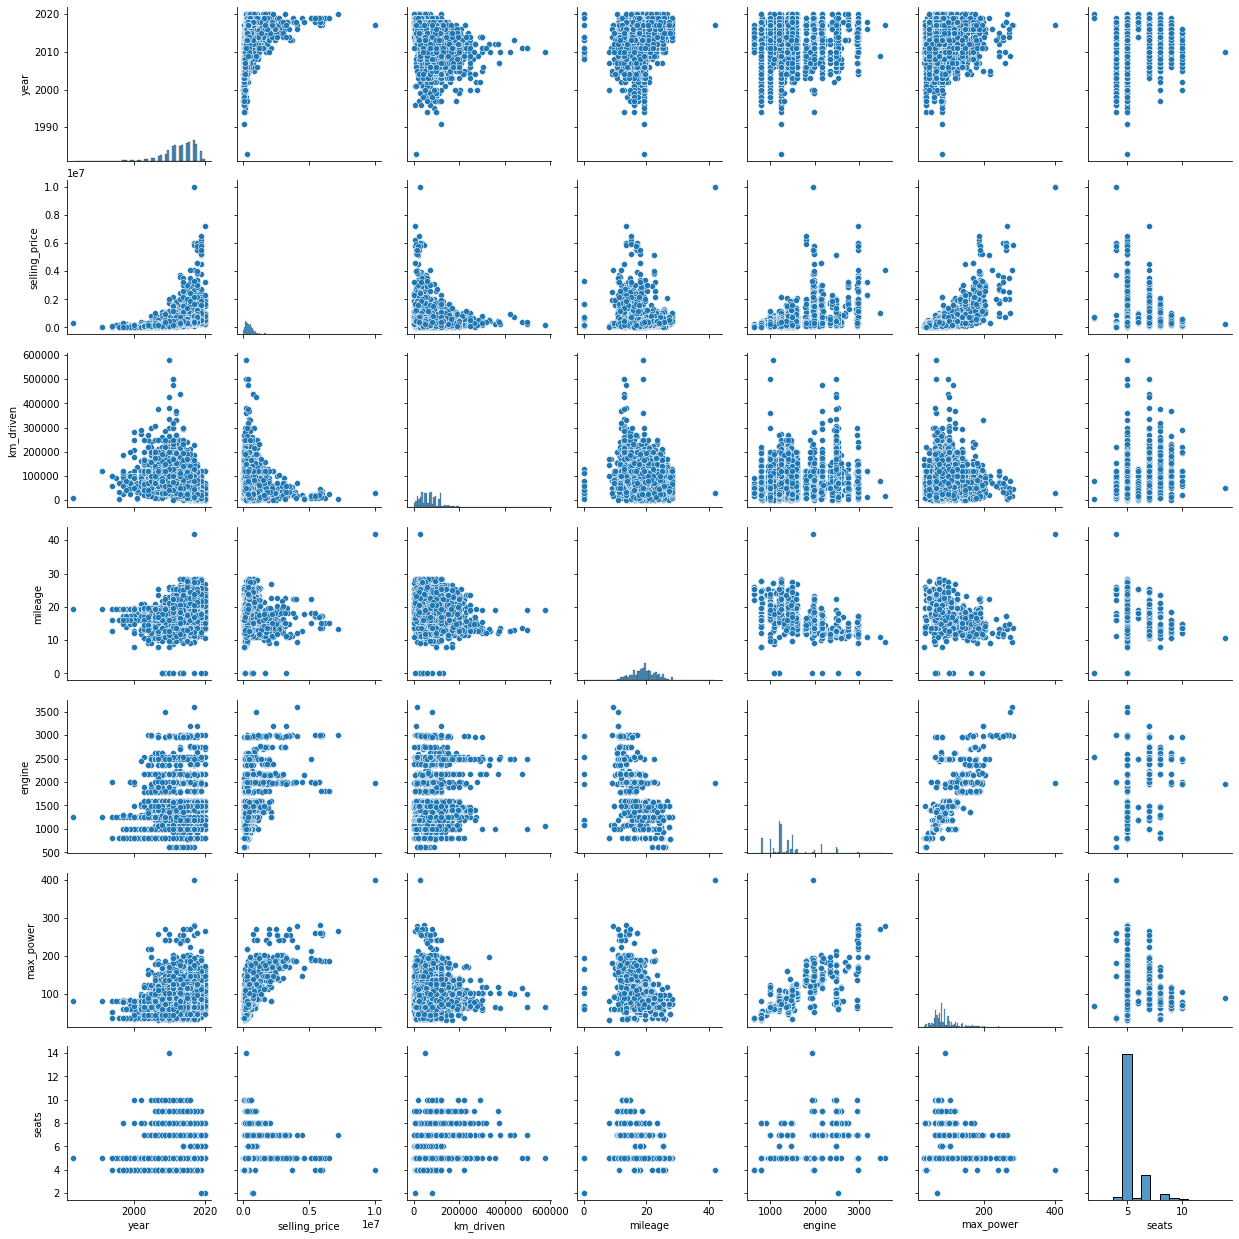

In [31]:
# посмотрим на графики без выбросов km_driven
sns.pairplot(df_train.loc[df_train.km_driven < 10**6, num_cols])

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

- Что можно сказать о связи предикторов с целевой переменной?

Кажется, что признаки km_driven и year имеют квадратичную зависимость с целевой переменной. Менее понятна связь selling_price с engine и max_power (которые имеют достаточно заметную корреляцию), но кажется, что она также есть.

- А о корреляциях признаков?

engine и max_power имеют заметную положительную корреляцию. Также кажется, что есть отрицательная корреляция engine с mileage, что кажется логичным, если рассматривать mileage как расход, т е чем мощнее двигатель, тем меньше км мы можем проехать за единицу топлива, т е больге расход.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

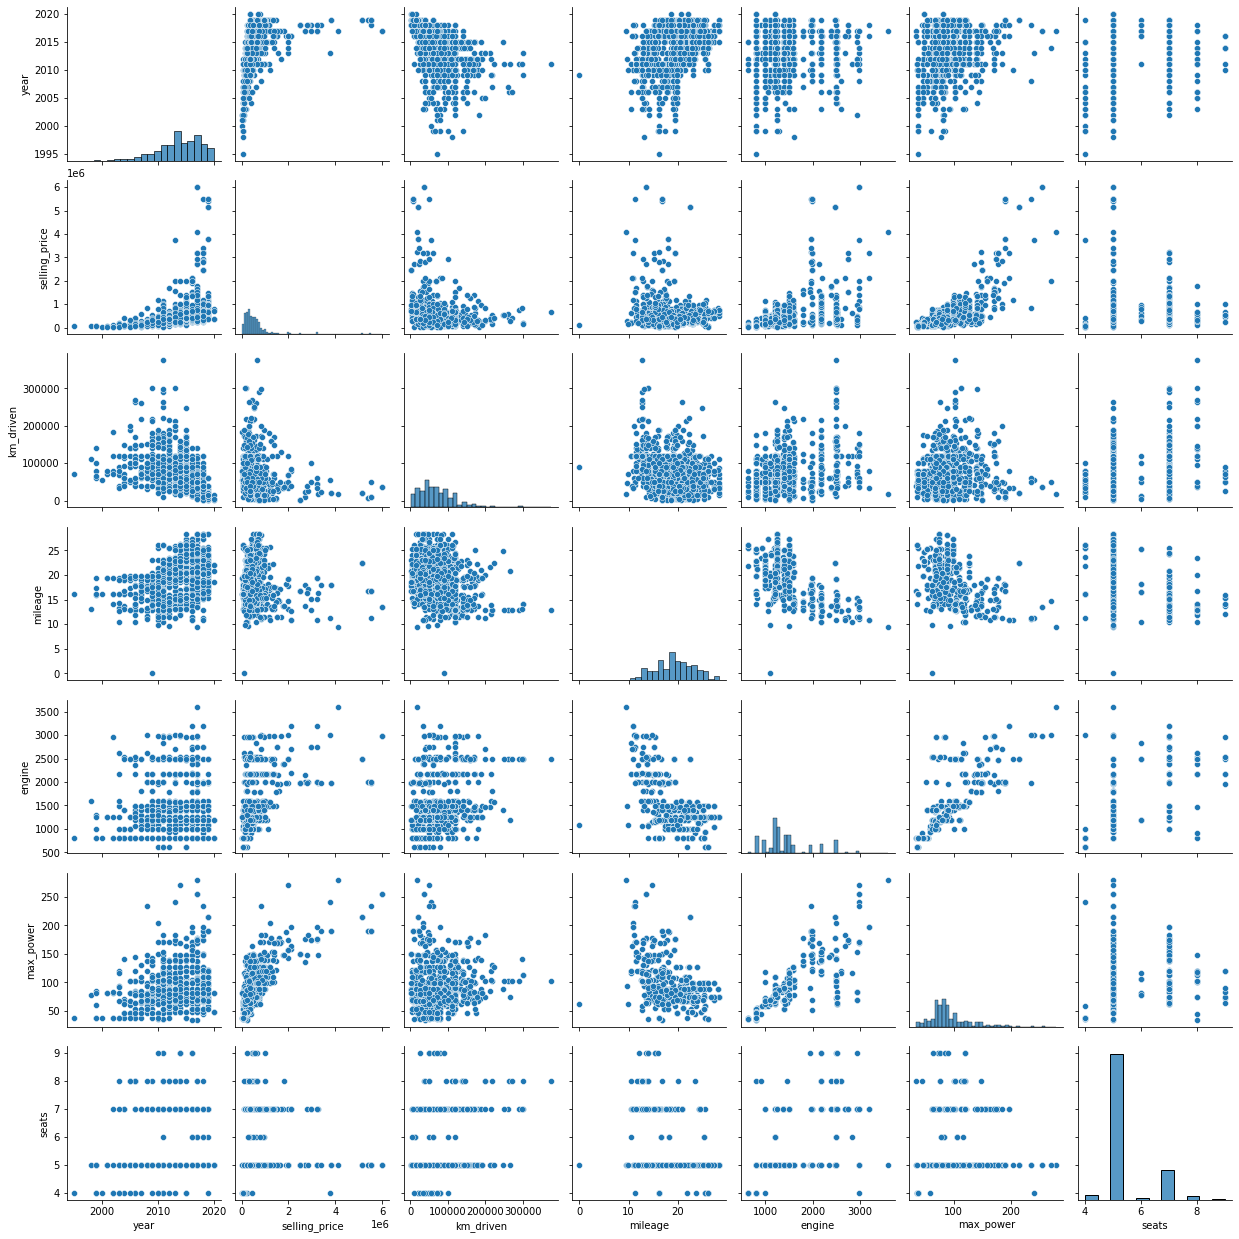

In [32]:
sns.pairplot(df_test[num_cols])

- Похожими ли оказались совокупности при разделении на трейн и тест?

Кажется, что группы достаточно похожи по виду графиков (особенно без учета выбросов в трейне)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

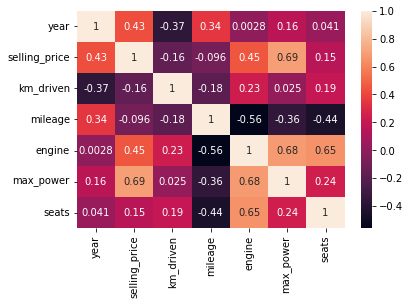

In [33]:
sns.heatmap(df_train.select_dtypes(include=np.number).corr(), annot=True)

In [34]:
df_train.select_dtypes(include=np.number).corr().apply(abs).min().min()

0.0028189953782030135

In [35]:
df_train.select_dtypes(include=np.number).corr().min().min()

-0.5596642374328993

In [36]:
dfff = df_train.select_dtypes(include=np.number).corr()
np.fill_diagonal(dfff.values, np.nan)
dfff.apply(abs).max().max()

0.6937424957757186

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font> 
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

- Какие 2 признака наименее скоррелированы между собой?

engine и year

- Между какими наблюдается довольно сильная положительная линейная зависимость?

если считать именно признаки, то это связь между engine и max_power. Также довольно высокая и близкая к масимальной корреляция наблюдается между engine и seats (что логично, т к для большего числа пассажиров нужен более мощный двигатель). Если рассматривать не только признаки, то наиболее высокая корреляция между selling_price и max_power.

- Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.

По данным есть некоторая отрицательная корреляция между двумя этими признаками и она относительно немаленькая, но и не большая. В данном случае такое предположение звучит логично (но как будто выполняется далеко не всегда) и это стоит проверить. Я бы не сказал, что мы можем уверенно утвержать такую связь, т к корреляция ничего нам не говорит о причинно-следственной связи.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot:xlabel='engine', ylabel='max_power'>

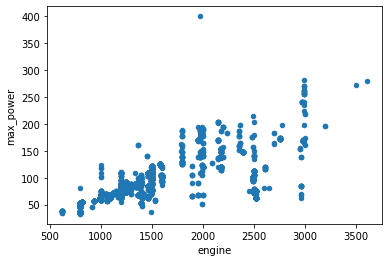

In [37]:
df_train.plot.scatter(x='engine', y='max_power')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [38]:
# your code here
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


Хочется посмотреть на расспределение распределение некоторых характеристик автомобилей

Видим, что в данных авто представлены за последние 35 лет и преимущественно за последние 10 лет с долей - 85.13%


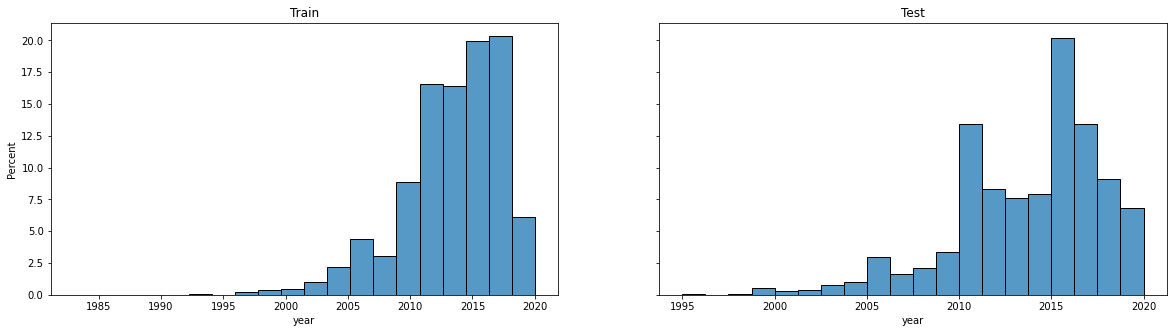

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
sns.histplot(df_train.year, bins=20, ax=ax[0], stat='percent')
ax[0].set_title('Train')
sns.histplot(df_test.year, bins=20, ax=ax[1], stat='percent')
ax[1].set_title('Test')
print(f'Видим, что в данных авто представлены за последние 35 лет и преимущественно за последние 10 лет с долей - {round(100*(pd.concat([df_train, df_test]).year >= 2010).sum()/pd.concat([df_train, df_test]).shape[0], 2)}%')

Распределение по типу топлива дает понять, что практически все автомобили либо на бензине, либо на дизеле


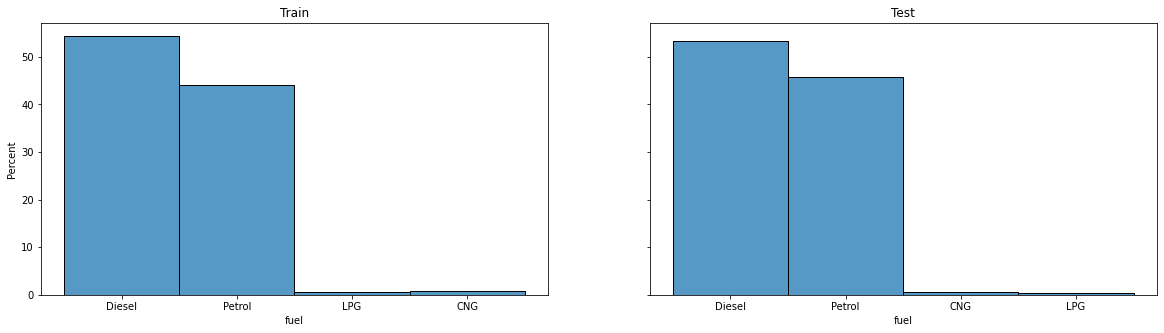

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
sns.histplot(df_train.fuel, bins=20, stat='percent', ax=ax[0])
ax[0].set_title('Train')
sns.histplot(df_test.fuel, bins=20, stat='percent', ax=ax[1])
ax[1].set_title('Test')
print('Распределение по типу топлива дает понять, что практически все автомобили либо на бензине, либо на дизеле')

По распределению по типу продавца видим, что более 80% всех автомобилей продаются частниками. Однако интересно, что в тесте незначительно, но все-таки больше дилерских объявлений


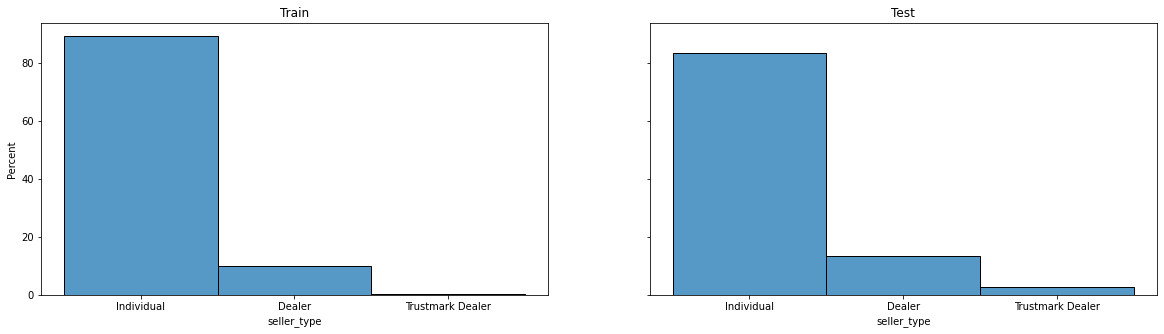

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
sns.histplot(df_train.seller_type, bins=20, stat='percent', ax=ax[0])
ax[0].set_title('Train')
sns.histplot(df_test.seller_type, bins=20, stat='percent', ax=ax[1])
ax[1].set_title('Test')
print('По распределению по типу продавца видим, что более 80% всех автомобилей продаются частниками. Однако интересно, что в тесте незначительно, но все-таки больше дилерских объявлений')

По распределению по типу трансмиссии видим, что около 90% всех автомобилей с ручной. В тесте чуть больше авто с автоматической коробкой


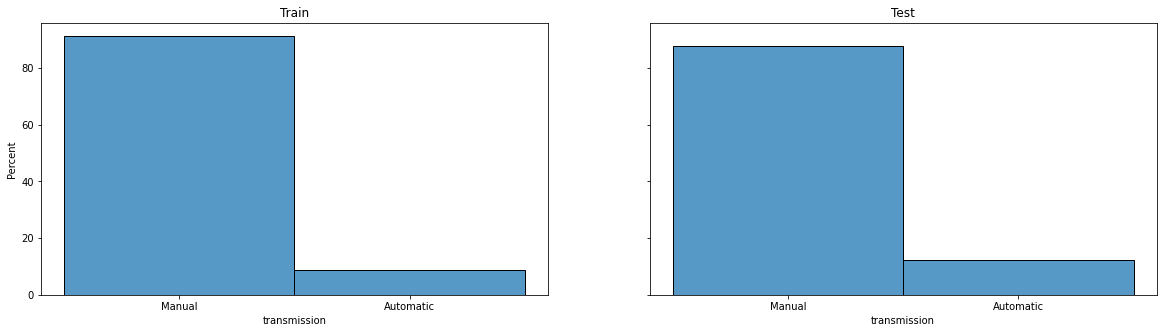

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
sns.histplot(df_train.transmission, bins=20, stat='percent', ax=ax[0])
ax[0].set_title('Train')
sns.histplot(df_test.transmission, bins=20, stat='percent', ax=ax[1])
ax[1].set_title('Test')
print('По распределению по типу трансмиссии видим, что около 90% всех автомобилей с ручной. В тесте чуть больше авто с автоматической коробкой')

Распределения для треина и теста по типу владельца, кажется, идентичны. Интересно, что около 60% всех объявлений от первого владельца авто 


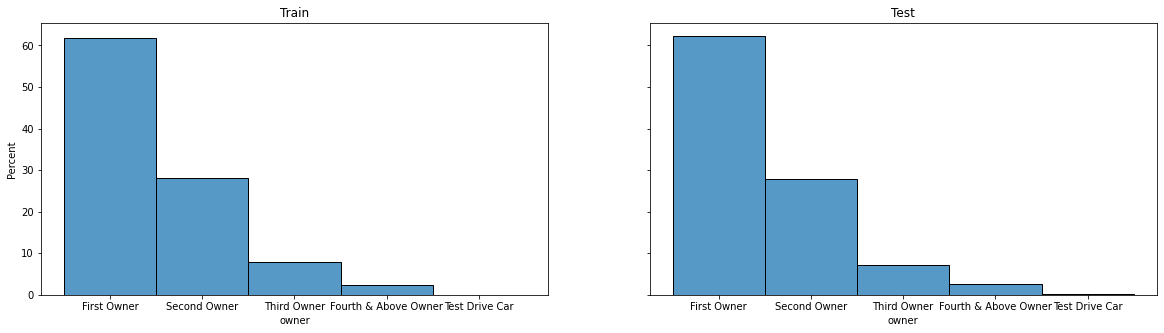

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
sns.histplot(df_train.owner, bins=20, stat='percent', ax=ax[0])
ax[0].set_title('Train')
sns.histplot(df_test.owner, bins=20, stat='percent', ax=ax[1])
ax[1].set_title('Test')
print('Распределения для треина и теста по типу владельца, кажется, идентичны. Интересно, что около 60% всех объявлений от первого владельца авто ')

Распределения по маркам авто в целом достаточно похожи. Видно, что некоторые марки есть в одном датасете и нет в другом


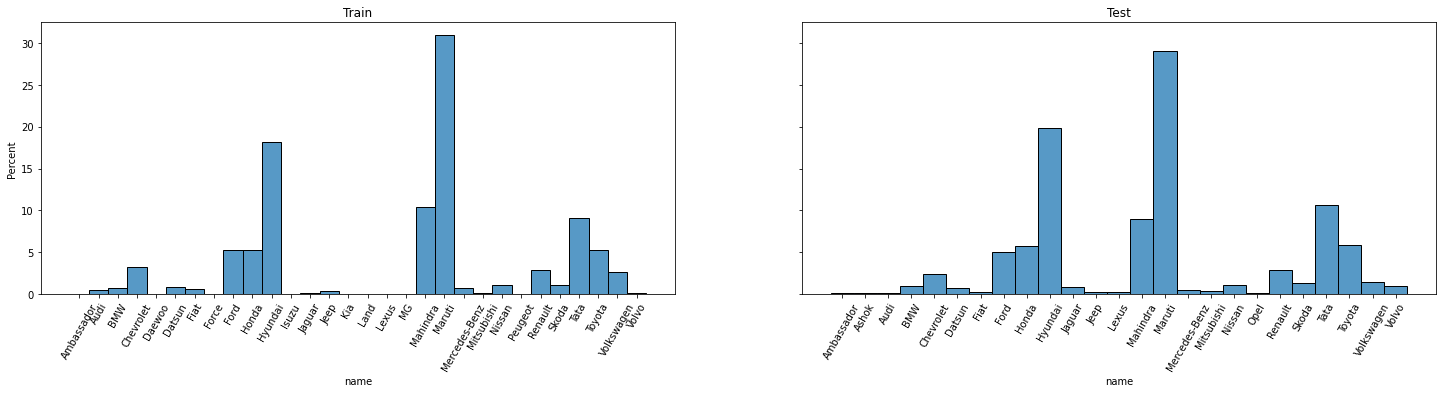

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(25, 5), sharey=True)
sns.histplot(df_train.name.sort_values().str.split().str[0], stat='percent', ax=ax[0])
ax[0].tick_params(axis='x', rotation=60)
ax[0].set_title('Train')

sns.histplot(df_test.name.sort_values().str.split().str[0], stat='percent', ax=ax[1])
ax[1].tick_params(axis='x', rotation=60)
ax[1].set_title('Test')

print('Распределения по маркам авто в целом достаточно похожи. Видно, что некоторые марки есть в одном датасете и нет в другом')

Посмотрим, какие именно это марки

In [45]:
symm_diff = set(df_train.name.str.split().str[0]).symmetric_difference(set(df_test.name.str.split().str[0]))
symm_diff

{'Ashok', 'Daewoo', 'Force', 'Isuzu', 'Kia', 'Land', 'MG', 'Opel', 'Peugeot'}

Видим, что таких очень мало и так вышло, что они оказались только в одном из датасетов. Да, мы получаем некоторый перекос, т к в идеале нужно было бы разделить их более равномерно. Но это скорее особенность рынка, что мы всегда можем получить какой-то "экзотический" авто

In [46]:
df_symm_diff = pd.concat([df_train, df_test])
df_symm_diff.loc[df_symm_diff.name.str.split().str[0].isin(symm_diff)].name.str.split().str[0].value_counts()

Force      4
Isuzu      4
Land       3
MG         3
Daewoo     3
Kia        3
Peugeot    1
Opel       1
Ashok      1
Name: name, dtype: int64

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [47]:
y_train = df_train.select_dtypes(include=np.number).selling_price
X_train = df_train.select_dtypes(include=np.number).drop('selling_price', axis=1)

In [48]:
assert X_train.shape == (5840, 6)

In [49]:
y_test = df_test.select_dtypes(include=np.number).selling_price
X_test = df_test.select_dtypes(include=np.number).drop('selling_price', axis=1)

In [50]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

reg_cls = LinearRegression()
reg_cls.fit(X_train, y_train)

pred_train = reg_cls.predict(X_train)
pred_test = reg_cls.predict(X_test)

[(r2_score(y_train, pred_train), MSE(y_train, pred_train)), 
 (r2_score(y_test, pred_test), MSE(y_test, pred_test))]

[(0.5929358160024358, 116680201306.0708),
 (0.5944447479362047, 233124739775.4167)]

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [53]:
reg_cls_tr = LinearRegression()
reg_cls_tr.fit(X_train_scale, y_train)

pred_train = reg_cls_tr.predict(X_train_scale)
pred_test = reg_cls_tr.predict(X_test_scale)

[(r2_score(y_train, pred_train), MSE(y_train, pred_train)), 
 (r2_score(y_test, pred_test), MSE(y_test, pred_test))]

[(0.5929358160024347, 116680201306.0711),
 (0.5944447479362147, 233124739775.41095)]

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [54]:
# отсортируем веса модели по модулю весов, чтобы понять, какой признак имеет наибольший вес
pd.concat([pd.Series(reg_cls_tr.coef_).abs(), pd.Series(X_train.columns)], axis=1).sort_values(0, ascending=False)

,0,1
4,323672.044479,max_power
0,153569.669564,year
3,58159.454642,engine
1,43689.678501,km_driven
2,26230.629825,mileage
5,22893.090376,seats


Если под наиболее информативным имеется в виду вносящий наибольший вклад, то это max_power

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [55]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso()
reg_lasso.fit(X_train_scale, y_train)

pred_train = reg_lasso.predict(X_train_scale)
pred_test = reg_lasso.predict(X_test_scale)

[(r2_score(y_train, pred_train), MSE(y_train, pred_train)), 
 (r2_score(y_test, pred_test), MSE(y_test, pred_test))]

[(0.5929358159675393, 116680201316.07349),
 (0.5944435845860712, 233125408502.29367)]

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [56]:
reg_lasso.coef_

array([153569.41140163, -43688.57173586,  26228.87253123,  58154.64334462,
       323672.99280123, -22890.16711682])

Веса не занулились, т к по умолчанию в Лассо альфа=1, что может быть не оптимальным параметром. В этом случае нет гарантии зануления

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [57]:
# функция для отрисовки графика сходимости GridSearchCV
def show_gs_plot(alpha_arr, gs):
    plt.plot(alpha_arr, -gs.cv_results_["mean_test_score"]) 
    plt.xscale("log") 
    plt.xlabel("alpha") 
    plt.ylabel("CV score")

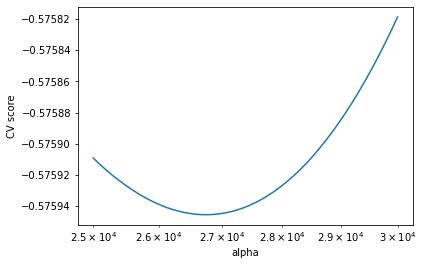

In [58]:
from sklearn.model_selection import GridSearchCV

alpha_arr = np.linspace(25000, 30000, 50)
gs = GridSearchCV(Lasso(), [{'alpha':alpha_arr}], scoring='r2', cv=10)
gs.fit(X_train_scale, y_train)
show_gs_plot(alpha_arr, gs)

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

В данном случае 500, т к на каждый гиперпараметр лямбда происходит кросс-валидация на 10 фолдах

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [59]:
# коэффициент регуляризации у лучшей из перебранных моделей
gs.best_params_['alpha']

26734.69387755102

In [60]:
reg_lasso_gs = Lasso(alpha=gs.best_params_['alpha'])
reg_lasso_gs.fit(X_train_scale, y_train)
reg_lasso_gs.coef_

array([145601.28436008, -15696.73685384,      0.        ,      0.        ,
       322191.10025442,     -0.        ])

In [61]:
pred_train = reg_lasso_gs.predict(X_train_scale)
pred_test = reg_lasso_gs.predict(X_test_scale)

[(r2_score(y_train, pred_train), MSE(y_train, pred_train)), 
 (r2_score(y_test, pred_test), MSE(y_test, pred_test))]

[(0.583618910033567, 119350783751.62401),
 (0.5650559236552928, 250018275188.72537)]

На этот часть весов занулилась, т к гиперпараметр альфа был выбран оптимальным

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

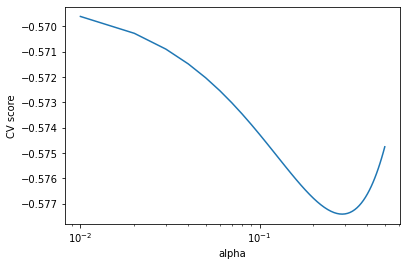

In [62]:
from sklearn.linear_model import ElasticNet

alpha_arr = np.linspace(0.01, 0.5, 50)
gs = GridSearchCV(ElasticNet(), [{'alpha':alpha_arr}], scoring='r2', cv=10)
gs.fit(X_train_scale, y_train)
show_gs_plot(alpha_arr, gs)

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [63]:
# гиперпараметр лучшей из перебранных моделей?
gs.best_params_['alpha']

0.29000000000000004

In [64]:
reg_elnet = ElasticNet(alpha=gs.best_params_['alpha'])
reg_elnet.fit(X_train_scale, y_train)

pred_train = reg_elnet.predict(X_train_scale)
pred_test = reg_elnet.predict(X_test_scale)

[(r2_score(y_train, pred_train), MSE(y_train, pred_train)), 
 (r2_score(y_test, pred_test), MSE(y_test, pred_test))]

[(0.585600815549178, 118782693647.84695),
 (0.5629781173271756, 251212657599.21335)]

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [65]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)

In [66]:
assert X_train_cat.shape == (5840, 10)

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [67]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from sklearn.compose import ColumnTransformer

num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first'), cat_cols),
    ('scaling', StandardScaler(), num_cols)
])

column_transformer.fit(X_train_cat)

X_train_transf = pd.DataFrame(column_transformer.transform(X_train_cat), 
                              columns=column_transformer.get_feature_names_out())
X_test_transf = pd.DataFrame(column_transformer.transform(X_test_cat), 
                             columns=column_transformer.get_feature_names_out())

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

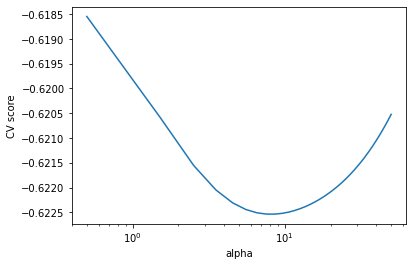

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_arr = np.linspace(0.5, 50, 50)
gs = GridSearchCV(Ridge(), [{'alpha':alpha_arr}], scoring='r2', cv=10)
gs.fit(X_train_transf, y_train)
show_gs_plot(alpha_arr, gs)

In [69]:
gs.best_params_['alpha']

8.581632653061224

In [70]:
reg_ridge_gs = Ridge(alpha=gs.best_params_['alpha'])
reg_ridge_gs.fit(X_train_transf, y_train)

pred_train = reg_ridge_gs.predict(X_train_transf)
pred_test = reg_ridge_gs.predict(X_test_transf)

[(r2_score(y_train, pred_train), MSE(y_train, pred_train)), 
 (r2_score(y_test, pred_test), MSE(y_test, pred_test))]

[(0.6557133158387809, 98685763066.71834),
 (0.6453659480341444, 203853779871.74182)]

- Удалось ли улучшить качество предсказаний?

Добавление категориальных признаков улучшило предсказание с 0.59 до 0.64. Скорее такого результата стоило ожидать, т к дали на вход больше правильно обработанных (наверное :)) данных, по которым можно сделать более точный прогноз. Улучшение небольшое, но все равно приятно :)

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

По совету выше посмотрим на распределение таргета:

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

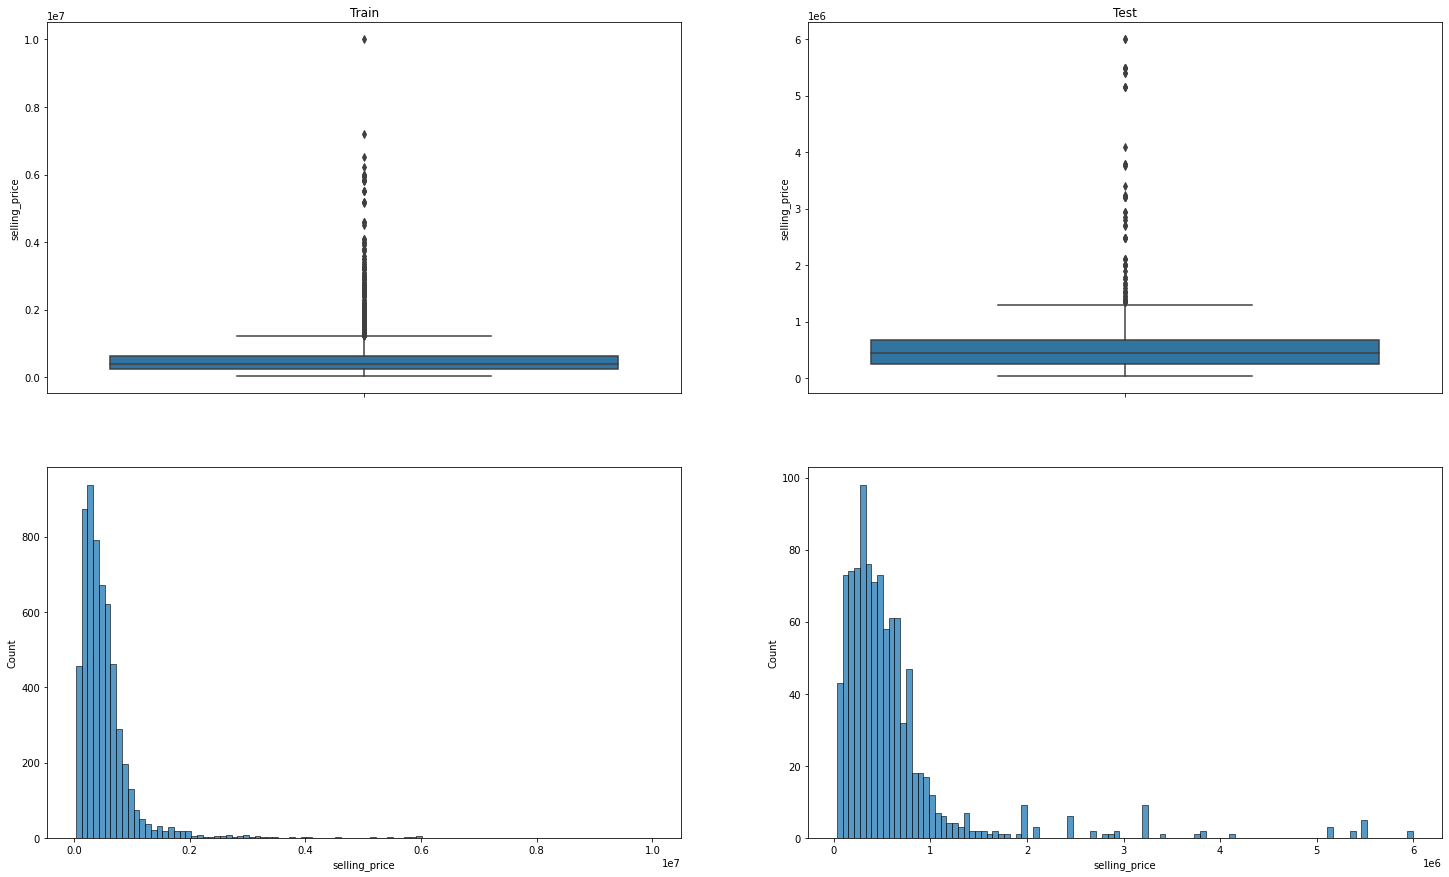

In [91]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
sns.boxplot(y=df_train.selling_price, ax=ax[0, 0])
ax[0, 0].set_title('Train')
sns.boxplot(y=df_test.selling_price, ax=ax[0, 1])
ax[0, 1].set_title('Test')
sns.histplot(x=df_train.selling_price, ax=ax[1, 0], bins=100)
sns.histplot(x=df_test.selling_price, ax=ax[1, 1], bins=100)

Видим, что распределение похоже на логнормальное, т е есть похожее на нормальное скопление данных у левого края, а также тяжелые хвосты. 

Также присутствуют достаточно заметные выбросы как в трейне, так и тесте. Однако если посмотреть эти записи, становится понятно, что это не выбросы. Это авто высокого класса от топ-производителей + еще и самых свежих годов выпуска 2016-2020 (при учете, что данные имеются с 1985 по 2020). Кажется, что считать их выбросами некорректно.

In [2247]:
# часть этих данных для наглядности
df_train.loc[df_train.selling_price > 4*10**6].sort_values('selling_price', ascending=False).head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
151,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.000,1969,400.000,4
2283,BMW X7 xDrive 30d DPE,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.380,2993,265.000,7
3597,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.260,1798,187.740,5
3595,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.260,1798,187.740,5
871,BMW 6 Series GT 630d Luxury Line,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.090,2993,261.400,4


Выводы выше говорят в пользу того, чтобы прологарифмировать наш таргет:

In [94]:
y_train = np.log(df_train.selling_price + 1)
y_test = np.log(df_test.selling_price + 1)

Действительно, после преобразования распределение стало очень похоже на нормальное

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

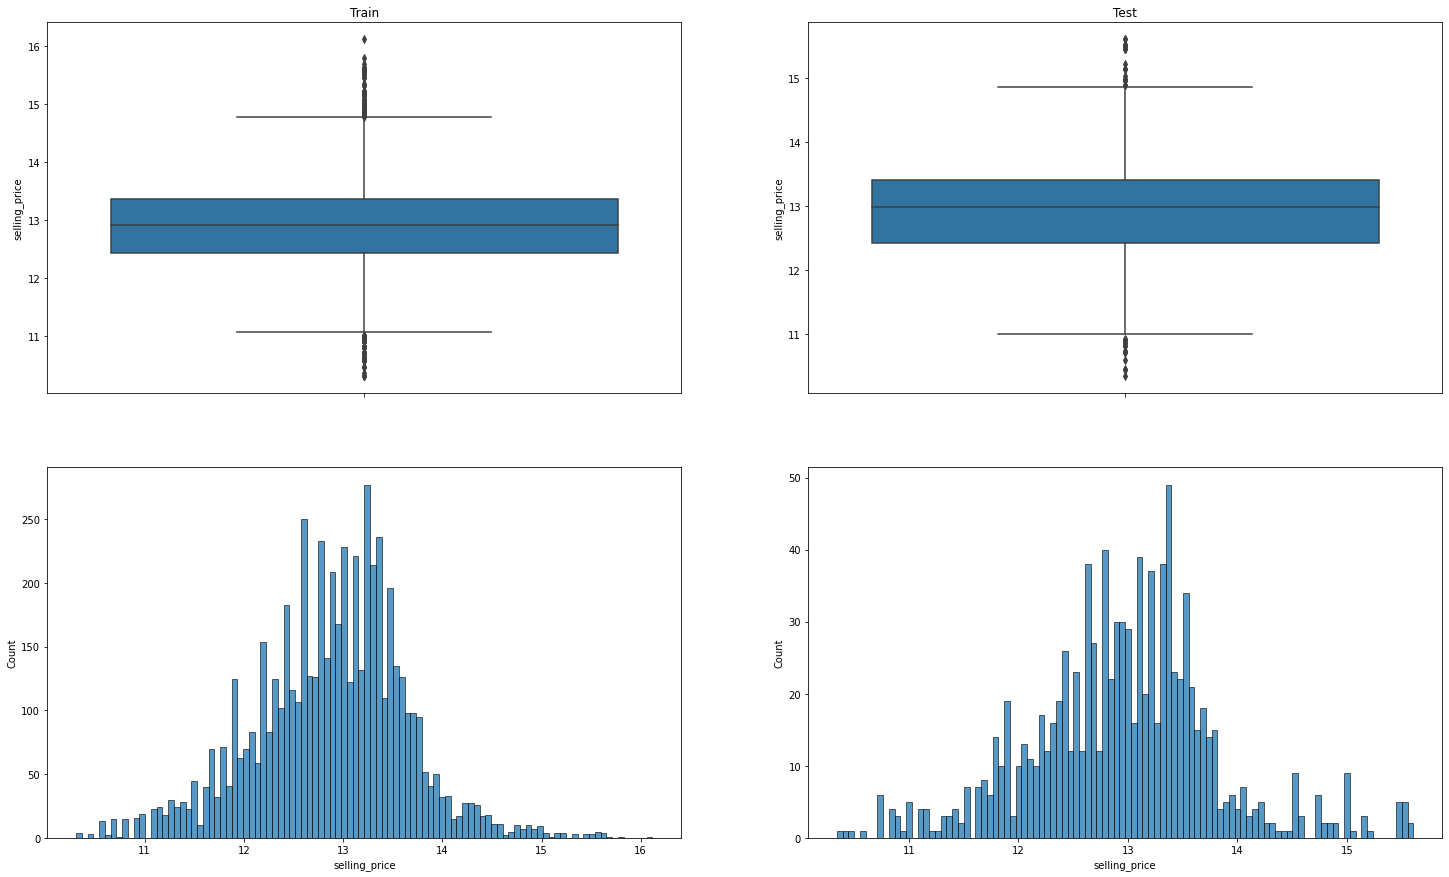

In [95]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
sns.boxplot(y=y_train, ax=ax[0, 0])
ax[0, 0].set_title('Train')
sns.boxplot(y=y_test, ax=ax[0, 1])
ax[0, 1].set_title('Test')
sns.histplot(x=y_train, ax=ax[1, 0], bins=100)
sns.histplot(x=y_test, ax=ax[1, 1], bins=100)

Удаляем таргет из начального датасета

In [2249]:
X_train_cat = df_train.drop(['selling_price'], axis=1)
X_test_cat = df_test.drop(['selling_price'], axis=1)

Признак km_driven также имеет заметные выбросы

Text(0.5, 1.0, 'Test')

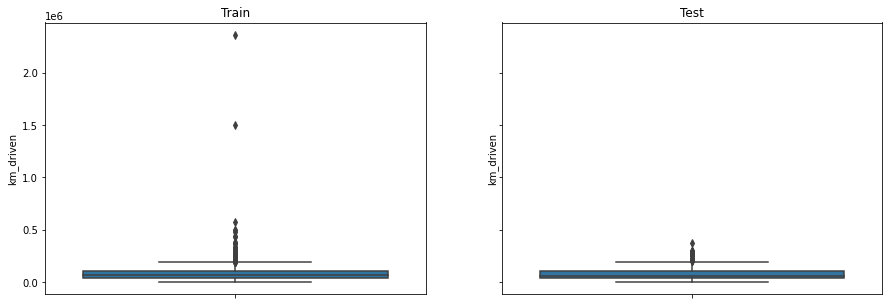

In [2250]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.boxplot(y=X_train_cat.km_driven, ax=ax[0])
ax[0].set_title('Train')
sns.boxplot(y=X_test_cat.km_driven, ax=ax[1])
ax[1].set_title('Test')

Эти выбросы уже не так однозначны, т к, по моим ощущениям, автомобиль не мог проехать 2.3М или 1.5М км с 2007 и 2012 года соответственно:

In [2251]:
# часть этих данных для наглядности
X_train_cat.loc[X_train_cat.km_driven > 3*10**5].sort_values('km_driven', ascending=False).head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2680,Hyundai i20 Asta 1.2,2007,2360457,Petrol,Individual,Manual,Second Owner,18.600,1197,81.830,5
1397,Mahindra XUV500 W6 2WD,2012,1500000,Diesel,Individual,Manual,First Owner,15.100,2179,140.000,7
2700,Maruti Wagon R LXI Minor,2010,577414,Petrol,Individual,Manual,Second Owner,18.900,1061,67.000,5
2780,Maruti Wagon R VXI BS IV,2011,500000,Petrol,Individual,Manual,Second Owner,18.900,998,67.100,5
4844,Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII,2011,500000,Diesel,Individual,Manual,Second Owner,12.990,2494,100.570,7


Однако возможно все, поэтому поступаем также, как с таргетом - логарифмируем признак

In [2252]:
X_train_cat.km_driven = np.log(X_train_cat.km_driven + 1)
X_test_cat.km_driven = np.log(X_test_cat.km_driven + 1)

Идея следующего признака в том, чтобы по названию бренда определить авто относящиеся к неизвестным (по крайней мере мне :)) или локальным производителям. Также если посмотреть описательные статистики по такому разделению, кажется, что разница действительно есть:

In [2253]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# список неизвестных брендов
noname_cars = ['Maruti', 'Tata', 'Force', 'MG', 'Ambassador', 'Ashok', 'Mahindra']

# статистики по train
df_train_test_prem = df_train[['name', 'selling_price']].copy()
df_train_test_prem.name = df_train_test_prem.name.str.split().str[0]\
                                            .apply(lambda x: 'no_prem' if x in noname_cars else 'prem')
df_train_test_prem = df_train_test_prem.groupby('name').selling_price.describe().T
df_train_test_prem.columns = ['TRAIN_no_prem', 'TRAIN_prem']

# статистики по test
df_test_test_prem = df_test[['name', 'selling_price']].copy()
df_test_test_prem.name = df_test_test_prem.name.str.split().str[0]\
                                            .apply(lambda x: 'no_prem' if x in noname_cars else 'prem')
df_test_test_prem = df_test_test_prem.groupby('name').selling_price.describe().T
df_test_test_prem.columns = ['TEST_no_prem', 'TEST_prem']

# общее
pd.concat([df_train_test_prem, df_test_test_prem], axis=1)

,TRAIN_no_prem,TRAIN_prem,TEST_no_prem,TEST_prem
count,2959.000,2881.000,488.000,512.000
mean,429833.683,618607.797,423926.389,802783.133
std,281795.520,693986.603,275322.858,991204.187
min,29999.000,30000.000,31000.000,33983.000
25%,215000.000,275000.000,210000.000,310000.000
50%,375000.000,450000.000,370000.000,500000.000
75%,600000.000,690000.000,600000.000,750000.000
max,1900000.000,10000000.000,1460000.000,6000000.000


Добавим новый признак prem

In [2254]:
# название бренда
X_train_cat.name = X_train_cat.name.str.split().str[0]
X_test_cat.name = X_test_cat.name.str.split().str[0]

# новый признак
X_train_cat['prem'] = X_train_cat.name.apply(lambda x: 'no_prem' if x in noname_cars else 'prem')
X_test_cat['prem'] = X_test_cat.name.apply(lambda x: 'no_prem' if x in noname_cars else 'prem')

# удаляем признак name
X_train_cat = X_train_cat.drop(['name'], axis=1)
X_test_cat = X_test_cat.drop(['name'], axis=1)

По совету из данного раздела перекомпонуем признак owner (такой признак действительно дает улучшение)

In [2255]:
X_train_cat.owner = X_train_cat.owner.apply(lambda x: x if x in ['First Owner', 'Second Owner'] 
                                            else 'Above 2 Owner')
X_test_cat.owner = X_test_cat.owner.apply(lambda x: x if x in ['First Owner', 'Second Owner'] 
                                          else 'Above 2 Owner')

Также по совету из данного раздела заменим год на его квадрат, т к на scatterplot из раздела визуализации зависимость таргета действительно скорее квадратичная

In [2256]:
X_train_cat.year = X_train_cat.year ** 2
X_test_cat.year = X_test_cat.year ** 2

Используем Ridge-регрессию, давшую наилучший результат ранее 

In [2275]:
num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'seats', 'prem']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first'), cat_cols),
    ('scaling', StandardScaler(), num_cols)
])

column_transformer.fit(X_train_cat)

X_train_transf = pd.DataFrame(column_transformer.transform(X_train_cat), 
                              columns=column_transformer.get_feature_names_out())
X_test_transf = pd.DataFrame(column_transformer.transform(X_test_cat), 
                             columns=column_transformer.get_feature_names_out())

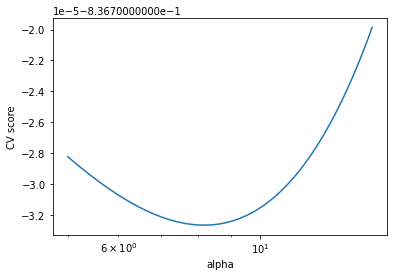

In [2276]:
alpha_arr = np.linspace(5, 15, 50)
gs = GridSearchCV(Ridge(), [{'alpha':alpha_arr}], scoring='r2', cv=10)
gs.fit(X_train_transf, y_train)
show_gs_plot(alpha_arr, gs)

In [2277]:
reg_ridge_gs = Ridge(alpha=gs.best_params_['alpha'])
reg_ridge_gs.fit(X_train_transf, y_train)

pred_train = reg_ridge_gs.predict(X_train_transf)
pred_test = reg_ridge_gs.predict(X_test_transf)

[(r2_score(np.exp(y_train)-1, np.exp(pred_train)-1), MSE(np.exp(y_train)-1, np.exp(pred_train)-1)), 
 (r2_score(np.exp(y_test)-1, np.exp(pred_test)-1), MSE(np.exp(y_test)-1, np.exp(pred_test)-1))]

[(0.8045269744226394, 56030063245.2833),
 (0.836523473855826, 93970975404.24596)]

В итоге удалось добиться гораздо лучшего результата по сравнению с предыдущими попытками, но уверен, что можно было лучше)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [1854]:
def business_metrics(y_true, y_pred):
    assert isinstance(y_true, (pd.core.series.Series, np.ndarray, list)) and \
            isinstance(y_true, (pd.core.series.Series, np.ndarray, list)) and \
            len(y_true) == len(y_pred)
        
    return sum((abs(np.array(y_true) - np.array(y_pred)) / np.array(y_true)) <= 0.1)/len(y_true)

In [2278]:
business_metrics(np.exp(y_test)-1, np.exp(pred_test)-1), business_metrics(np.exp(y_train)-1, np.exp(pred_train)-1)

(0.272, 0.2851027397260274)

# Для сервиса

In [2279]:
import pickle

# добавляем модель и трансформер данных
result_dict['model'] = reg_ridge_gs
result_dict['scaler'] = column_transformer

# записываем в pickle
with open('model_data.pkl', 'wb') as file:
    pickle.dump(result_dict, file)
    
result_dict

{'mileage_median': 19.3,
 'engine_median': 1248.0,
 'max_power_median': 81.86,
 'seats_median': 5.0,
 'model': Ridge(alpha=8.26530612244898),
 'scaler': ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first'),
                                  ['fuel', 'seller_type', 'transmission',
                                   'owner', 'seats', 'prem']),
                                 ('scaling', StandardScaler(),
                                  ['year', 'km_driven', 'mileage', 'engine',
                                   'max_power'])])}

план на завтра:
- перепроверить сервис еще раз
- немного хотя бы попробовать улучшить 
- почистить тетрадку
- оформить
- сдать

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link